# <center>Report for 2D Project Physical World and Digital World</center>

Cohort: F07

Team No.: 10

Members:
* Philip Andrew Wee De Wang (1003342)
* Nicholas Lim Jun Yuan (1003349)
* Stephen Alvin (1003309)
* Bhuvaneswari Sithanathan (1003798)


# <center>Introduction</center>

### __Problem__:

We wish to measure the temperature of a bottle, but we only wish to use the first 10 seconds of data in order to obtain the temperature at the 2 minute mark within 0.1 degrees celcius accuracy.

### __Approach__:

We will measure the temperature every second for 10 seconds, starting at 25 degrees celcius and at the end of 10 seconds we will run the collected data through our trained model to predict the temperature at the 2 minute mark

### __Summary__:

We realised that the water bath can only take the temperature every 2 seconds, and because we seperated the GUI and the raspberry pi, we also had to wait for firebase to update the values so our computer running the GUI could access the values and calculate it.

Hence, we changed our model to learn from just the first three sets of data collected, and managed to accurately predict the temperature within 1 degree celcius in under 10 seconds.



# <center>Description of Data from Experiment</center>

## Data Collection

Describe how you collect your data and the reasoning behind such approach.

### How data is collected:
1. If the water is higher temperature than the room, wait for the temperature increase to 26 degrees celcius, if not wait for the water to decrease to 24 degrees celcius
2. Every second afterward, record the temperature of the water with the sensor.
3. Wait for 2 minutes and record the temperature of the water with the thermometer

### Reasoning:
1. It is imperative that the starting temperature is always the same. Hence we write the program such that it starts at 26 degrees celcius, or 24 degrees celcius, making a constant starting point for both increasing and decreasing of temperatures
2. By collecting the data at every second, we are able to have more data points and thus more accurately determine the final temperature
3. Waiting 2 minutes should suffice for the thermometer to come within 0.1 degrees celcius of the actual water temperature, allowing us to know the actual temperature


## Data Preparation

The data is prepared in a .txt file in the below format (Not actual result):
```
Experiment
Final Temp: 37
1     24.2
2     25.2
3     26.2
4     27.2
5     28.2
6     29.2
7     30.2
8     31.2
9     32.2
10    33.2

Experiment
Final Temp: 37
1     24.2
2     25.2
3     26.2
4     27.2
5     28.2
6     29.2
7     30.2
8     31.2
9     32.2
10    33.2
```
Subsequent experiments will also be appended to the text file accordingly. This format allows us to easily code a program to store these values

## Data Format

When our model is trained, it is plotted on a 11 dimensional hyperplane which best fits the data provided.

When 10 dimensions of temperature corresponding to each second mark is provided, it then places these points on the hyperplane and determines the corresponsind 11th dimension of final temperature.

# <center>Training Model</center>



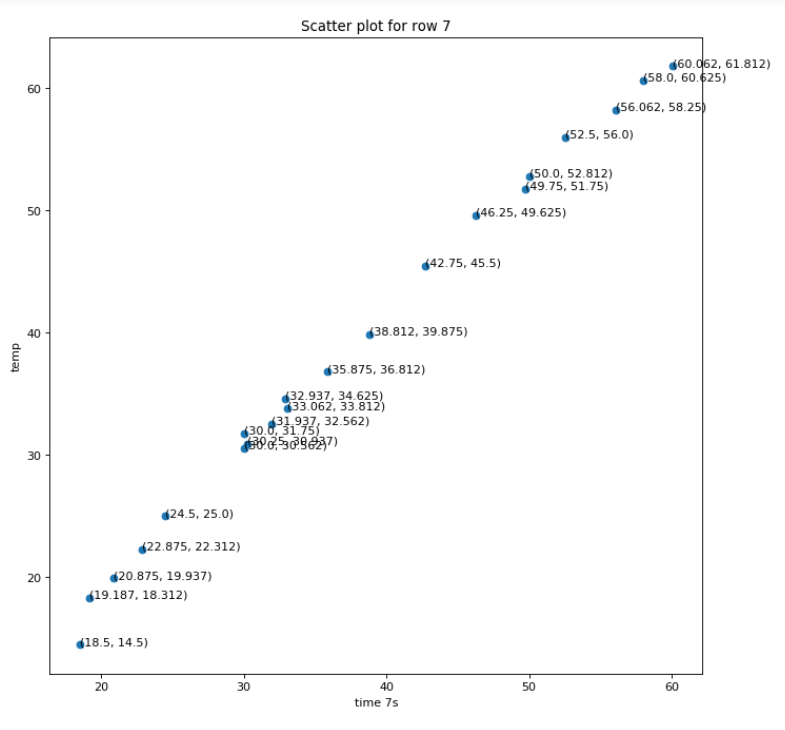 
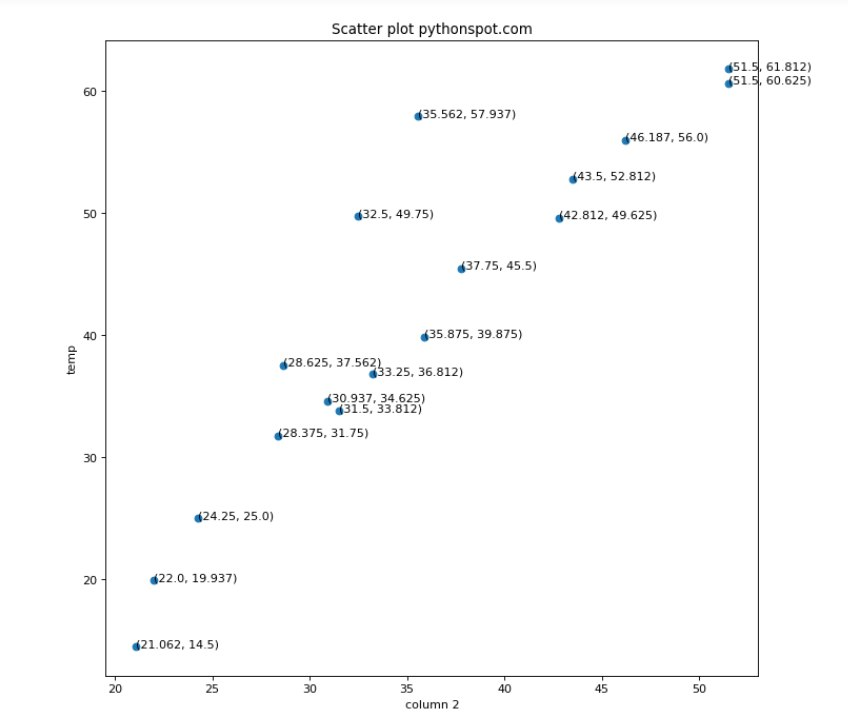

### Figure 1 <p style='float:right'>Figure 2</p>

Figure one shows the data points as visualised by our software for time t=7s

Figure two shows the old data points with the outliers still included for time t=2s

By visualising and analysing our data like this, we are able to identify and remove outliers, making our model more accurate

# Scripts Used and Explanation

### Imports for code

__Numpy__ -> Required for scikit-learn

__sklearn__ -> Required for linear regression code

__matplot__ -> Required for data visualisation to remove outliers


In [1]:
#Necessary Imports
import numpy as np
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Code for reading training data

This code reads the training data from the filename as defined at the top

If a line in the text file matches the string 'Experiment:' exactly, it will read the data

Otherwise, it will ignore that training set and move on

Outliers can be removed by replacing the string 'Experiment:' with '(outlier)Experiment:' in order to avoid it being read

The data is stored in a normal array in the following format:

```
 [['final temp''1s'     '2s'     '3s'     '4s'     '5s'     '6s'     '7s'     '8s'     '9s'    '10s']
 ['14.5'   '22.625' '21.812' '21.062' '20.375' '19.812' '19.375' '18.875' '18.5'   '18.125' '17.812']
 ['19.937' '23.062' '22.437' '22.0'   '21.687' '21.375' '21.187' '21.0'   '20.875' '20.75'  '20.687']
 ['25.0'   '24.125' '24.187' '24.25'  '24.312' '24.375' '24.375' '24.437' '24.5'   '24.5'   '24.562']
 ['33.812' '29.562' '30.75'  '31.5'   '32.0'   '32.375' '32.687' '32.875' '33.062' '33.187' '33.312']
 ['45.5'   '32.375' '35.562' '37.75'  '39.312' '40.562' '41.437' '42.187' '42.75'  '43.187' '43.562']]
```

In [2]:
filename = 'training data'

# code to read txt file

# open the file
f = open('{}.txt'.format(filename),'r')

#create an array to store the data
data = [['final temp','1s','2s','3s','4s','5s','6s','7s','8s','9s','10s']]

# iterate through the lines in the file
for line in f:
    #If the line starts with Experiment, extract the data
    if line.strip() == 'Experiment:':
        #Get ready to store the data for the current row
        data_row = []
        
        #Get the final temp
        final_temp_line = f.readline()
        final_temp_array = final_temp_line.split(" ")
        #The final temp is the 2 index in the array ['final','temp:','27']
        final_temp = final_temp_array[2].strip()
        data_row.append(final_temp)
        
        
        #Get the individual temp
        for i in range(10):
            temp_line = f.readline()
            temp_array = temp_line.split(" ")
            #the first number in the array is the time the reading is taken and the second the temperature at the time
            #the temp_at_time is the 1 index in the array ['1.0','26']
            temp_at_time = temp_array[1].strip()
            data_row.append(temp_at_time)
        
        #Add the row of data extracted to the full data line
        data.append(data_row)

#visualise the data extracted for debugging purposes
for i in range(len(data)):
    for j in range(len(data[i])):
        print('{:>10}'.format(data[i][j]), end='')
    print('')

#Always remember to close the file
f.close()

final temp        1s        2s        3s        4s        5s        6s        7s        8s        9s       10s
      14.5    22.625    21.812    21.062    20.375    19.812    19.375    18.875      18.5    18.125    17.812
    19.937    23.062    22.437      22.0    21.687    21.375    21.187      21.0    20.875     20.75    20.687
      25.0    24.125    24.187     24.25    24.312    24.375    24.375    24.437      24.5      24.5    24.562
    33.812    29.562     30.75      31.5      32.0    32.375    32.687    32.875    33.062    33.187    33.312
      45.5    32.375    35.562     37.75    39.312    40.562    41.437    42.187     42.75    43.187    43.562
    52.812    36.875     40.75      43.5    45.562    47.125    48.312     49.25      50.0    50.562      51.0
     31.75    26.875    27.562    28.375     28.75    29.187      29.5    29.687      30.0    30.125    30.312
    61.812      44.0    49.062      51.5    55.562     56.75    58.687    59.312    60.062    60.375    60.812
 

### Code for preprocessing data

Here we split take the data obtained, and we extract the y value and place it in a seperate array so we can insert it straight into our machine learning model

In [8]:
def preprocess(data):
    #Create the arrays for storing the information
    x_data = []
    y_data = []
    
    #This code utilises all the sets of data for training, from 1s to 10s. 
    #len(data)[0] can be modified to take in different amounts of data, perhaps from 1s to 3s
    #For example, our actual test only took data from 1s to 3s because taking 10 sets of data took too long
    
    for row_no in range(1,len(data)):
        #attach the first value of the row to the y data
        y_data.append(data[row_no][0])
        #create an array to contain all the x data
        x_data_row = []
        
        for col_no in range(1,len(data[0])):
            #attach the remaining values to the row of x data
            x_data_row.append(data[row_no][col_no])
            
        #attach the row of x data to the overall x data
        x_data.append(x_data_row)
        
    return x_data,y_data

#save the preprocessed data in x_data and y_data
x_data,y_data = preprocess(data)

#Code to visualise x data and y data for debugging
print('{:>10} |'.format('y_data'), end='')
print('{:>10}'.format('x_data'), end='')
print('\n')
for i in range(len(x_data)):
    print('{:>10} |'.format(y_data[i]), end='')
    for j in range(len(x_data[i])):
        print('{:>10}'.format(x_data[i][j]), end='')
    print('')

    y_data |    x_data

      14.5 |    22.625    21.812    21.062    20.375    19.812    19.375    18.875      18.5    18.125    17.812
    19.937 |    23.062    22.437      22.0    21.687    21.375    21.187      21.0    20.875     20.75    20.687
      25.0 |    24.125    24.187     24.25    24.312    24.375    24.375    24.437      24.5      24.5    24.562
    33.812 |    29.562     30.75      31.5      32.0    32.375    32.687    32.875    33.062    33.187    33.312
      45.5 |    32.375    35.562     37.75    39.312    40.562    41.437    42.187     42.75    43.187    43.562
    52.812 |    36.875     40.75      43.5    45.562    47.125    48.312     49.25      50.0    50.562      51.0
     31.75 |    26.875    27.562    28.375     28.75    29.187      29.5    29.687      30.0    30.125    30.312
    61.812 |      44.0    49.062      51.5    55.562     56.75    58.687    59.312    60.062    60.375    60.812
    34.625 |    27.875    29.875    30.937    31.625    32.062    32.437

### Data visualisation and outlier removal

Some of our tests were not done with the exact same conditions. The thermometer may have touched someone's hand resulting in data points not lying on the expected points. These points can be removed by visualising the data and removing points that lie outside the expected range

Input which timing to check (only integer from 1 to 10 please): 3


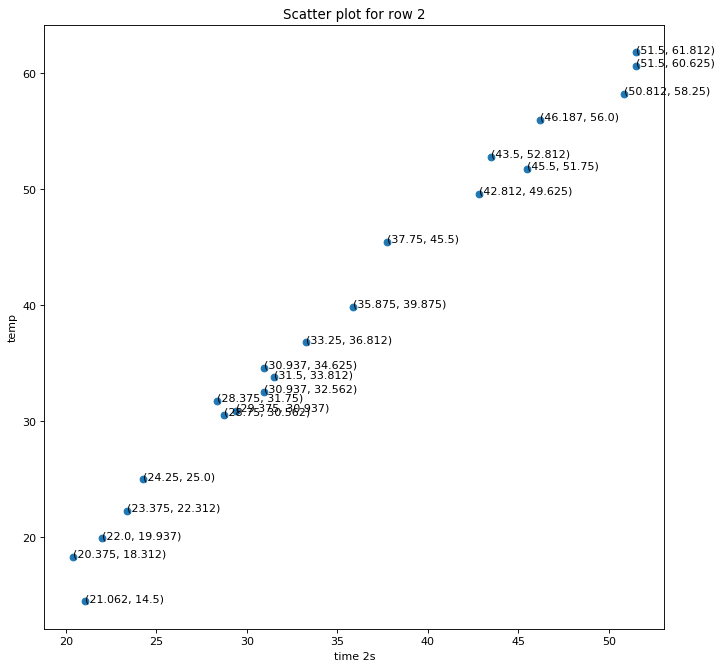

Data Points:
x            y
21.062  14.500
22.000  19.937
24.250  25.000
31.500  33.812
37.750  45.500
43.500  52.812
28.375  31.750
51.500  61.812
30.937  34.625
33.250  36.812
35.875  39.875
42.812  49.625
46.187  56.000
51.500  60.625
30.937  32.562
29.375  30.937
23.375  22.312
20.375  18.312
28.750  30.562
45.500  51.750
50.812  58.250


In [9]:
# Create the x data for a particular time t
z = int(input("Input which timing to check (only integer from 1 to 10 please): "))-1

#slice the array by column to obtain the appropriate timing
#convert it to float so it can be displayed properly
x_col = np.array(x_data)[:,z].astype(float)

#save the y data, and convert it to a float so it can be displayed properly
y = [float(i) for i in y_data]

# Plot the figure

#Code to make it bigger so we can see outliers properly
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter(x_col, y)
plt.title('Scatter plot for row {}'.format(z))
plt.xlabel('time {}s'.format(z))
plt.ylabel('temp')

#Code for labelling all the points
for i_x, i_y in zip(x_col, y):
    plt.text(i_x, i_y, '({}, {})'.format(i_x, i_y))
plt.show()

#code for visualing the data for debugging purposes
x_col = x_col.tolist()
y = [float(i) for i in y]

print('Data Points:')
print('{:<7}{:>7}'.format('x','y'))
for i in range(len(x_col)):
    print('{:<7.3f}{:>7.3f}'.format(x_col[i],y[i]))

### Creating the training data and testing data

We need to split our data into the training and testing set

The training set trains our model to find the hyperplane of best fit

The testing set gives us the R2 score, to determine how accurate our training data is

In [5]:
# write a code to split the data to train and test

def prepare_train_test(data,percentage_for_test):
    x_data,y_data = preprocess(data)
    #split further into testdata and practice data
    x_train,x_test,y_train,y_test = train_test_split(x_data,\
                                                     y_data,\
                                                     test_size = percentage_for_test)
    
    #Convert all array values to float so scikit learn can run its function
    x_train =  np.array(x_train).astype(float)
    x_test =  np.array(x_test).astype(float)
    y_train =  np.array(y_train).astype(float)
    y_test =  np.array(y_test).astype(float) 
    
    return x_train,x_test,y_train,y_test

#Code for visualising the data split, and making sure it performs as expected
x_train_visual,x_test_visual,y_train_visual,y_test_visual = prepare_train_test(data,0.5)

print('Training Data \n')
print('{:>10} |'.format('y_train'), end='')
print('{:>10}'.format('x_train'), end='')
print('')
for i in range(len(x_train_visual)):
    print('{:>10} |'.format(y_train_visual[i]), end='')
    for j in range(len(x_train_visual[i])):
        print('{:>10}'.format(x_train_visual[i][j]), end='')
    print('')
print('\n')

print('Testing Data \n')
print('{:>10} |'.format('y_test'), end='')
print('{:>10}'.format('x_test'), end='')
print('')
for i in range(len(x_test_visual)):
    print('{:>10} |'.format(y_test_visual[i]), end='')
    for j in range(len(x_test_visual[i])):
        print('{:>10}'.format(x_test_visual[i][j]), end='')
    print('')

Training Data 

   y_train |   x_train
    34.625 |    27.875    29.875    30.937    31.625    32.062    32.437    32.687    32.937    33.125    33.312
    18.312 |     21.75    20.875    20.375      20.0     19.75    19.562    19.312    19.187    19.062      19.0
    30.562 |    26.687    28.125     28.75    29.125      29.5    29.625    29.812      30.0    30.062    30.125
    33.812 |    29.562     30.75      31.5      32.0    32.375    32.687    32.875    33.062    33.187    33.312
      56.0 |    39.125    43.312    46.187    48.187     49.75    50.875    51.812      52.5    53.125    53.625
    19.937 |    23.062    22.437      22.0    21.687    21.375    21.187      21.0    20.875     20.75    20.687
    30.937 |      28.5    29.062    29.375    29.625    29.812      30.0    30.125     30.25    30.312    30.375
     58.25 |    42.375    47.437    50.812    52.437    53.687    54.625    55.437    56.062      56.5    56.812
     51.75 |     37.75    43.125      45.5    46.937    4

### Code for training the machine learning model

We now need to train our model to find the hyperplane of best fit

In [6]:
# write a code to train the model
# the function should return the trained model
def train_model(data, percentage_for_test):
    
    x_train,x_test,y_train,y_test = prepare_train_test(data,percentage_for_test)
    
    #create the linear regression model
    model = linear_model.LinearRegression()
    model.fit(x_train,y_train)
    #predict the y values for a given c
    y_pred = model.predict(x_test)
    
    #calculate the R2,MSE,coef and intercept
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test,y_pred)
    coef = model.coef_
    intercept = model.intercept_
    
    #generate the results dictionary to show the accuracy
    results = {"mean squared error" : MSE,
               "intercept" : intercept,
               "coefficients" : coef,
               "r2 score" : R2}
    
    return results,model

#Save the results of the testing of the test data, as well as the model to predict the temperature in the future
results,model = train_model(data,0.1)

#print the results for checking
print('----------RESULTS----------')
print('{:<17}{:>10.2f}'.format('MSE',results['mean squared error']))
print('{:<17}{:>10.2f}'.format('intercept',results['intercept']))
for i in range(len(results['coefficients'])):
    print('{:<17}{:>10.4f}'.format('t={}s coef'.format(i+1),results['coefficients'][i]))
print('{:<17}{:>10.2f}'.format('r2 score',results['r2 score']))
#print('{:<17}{:>10}'.format('Actual Temp', actual_temp))
#print('{:<17}{:>10.2f}'.format('Abs Error', abs_error_vector))

----------RESULTS----------
MSE                    2.26
intercept              1.28
t=1s coef           -0.1001
t=2s coef            0.0323
t=3s coef            1.2547
t=4s coef            1.5787
t=5s coef           -2.1630
t=6s coef           -3.3872
t=7s coef           -2.3493
t=8s coef            2.7051
t=9s coef           -3.4642
t=10s coef           6.8402
r2 score               0.99


### Accuracy Testing

We need to determine the margin of error of our model, and we can do so using this function

In [7]:
# write a code to check your accuracy

prediction = [[42.375,47.437,50.812,52.437,53.687,54.625,55.437,56.062,56.5,56.812]]
actual_temp = 58.74

#Convert the prediction to a numpy array containing floats so our model can predict it
prediction = np.array(prediction).astype(float)
#Predict the temperature using the model
result = int(model.predict(prediction))
#Get the error in measurement
abs_error_vector = abs(actual_temp - result)

print('----------RESULTS----------')
print('{:<17}{:>10.2f}'.format('Predicted Temp',result))
print('{:<17}{:>10.2f}'.format('Actual Temp', actual_temp))
print('{:<17}{:>10.2f}'.format('Abs Error', abs_error_vector))

----------RESULTS----------
Predicted Temp        58.00
Actual Temp           58.74
Abs Error              0.74
